# 8. Ensemeble (앙상블 방법)

### 결정 트리의 약점인 과적합으로 인한 예측력을 보완

|module/class|class/method|description|
|-|-|-|
|sklearn.ensemble|BaggingClassifier(...)|Bagging
||RandomForestClassifier(...)|Random Forest
||AdaBoostClassifier(...)|AdaBoost
||GradientBoostingClassifier(...)|Gradient Boosting
|sklearn.ensemble.BaggingClassifier|fit(X,y)|의사결정나무모형 적합
||predict(X)|의사결정나무모형 예측
||predict_proba(X)|의사결정나무모형 클래스 확률 예측
||score(X, y)|예측 정분류율 계산
|sklearn.metrics|accuracy_score(y, y_pred)|정분류율 계산
||f1_score(y, y_pred)|F1 값 계산
||precision_score(y, y_pred)|정확률 계산
||recall_score(y, y_pred)|재현율
||roc_auc_score(y, y_pred_prob)|AUC
||roc_curve(y, y_pred_prob)|ROC
||auc(x_array, y_array)|AUC
||log_loss(y, y_pred_prob)|negative log_likelihood
||RocCurveDisplay(fpr, tpr, roc_auc,...)|display roc curve

### Bagging (배깅)
> 훈련데이터에서 랜덤하게 추출된 샘플데이터를 통해 약한 의사결정나무모형을 만들어 각 트리모형의 예측치의 평균(회귀모형인 경우) 또는 다수결의 방법으로 결합하는 앙상블 방법

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier as bagging
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT

In [40]:
cancer = load_breast_cancer()

In [70]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df["class"] = cancer.target
# df['class'] = df['class'].map({0: 'negative', 1:'positive'})
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### 데이터 분할

In [71]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 트리 모형 생성

In [72]:
tree = DT(criterion='entropy', min_samples_split=4)
tree.fit(X_train, y_train)
bag_trees =  bagging(DT(), n_estimators=1000, max_samples=0.5, random_state=0)
# 변수 : (배깅트리(기본모형을 DT로 지정), 기본모형의 수, 랜덤샘플링 비율, 랜덤 스테이트)
bag_trees.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=1000, random_state=0)

In [73]:
# 학습된 모델에 테스트 데이터 적용하여 예측 결과
y_pred_tree = tree.predict(X_test)
y_pred_bag = bag_trees.predict(X_test)
y_pred_tree, y_pred_bag

(array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 0]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1]))

In [74]:
# 테스트 데이터 적용 시 예측력 평가 (배깅시, 일반 트리 순서)
print (bag_trees.score(X_test, y_test), tree.score(X_test, y_test))

# 예측 데이터와 테스트 데이터 차이의 점수 평가 (배깅시, 일반 트리 순서)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_bag), accuracy_score(y_test, y_pred_tree))

0.9736842105263158 0.9298245614035088
0.9736842105263158 0.9298245614035088


### 결론 : 전체적으로 배깅이 일반적인 결정 트리 모델보다 정확성이 뛰어난 것을 확인 가능

In [88]:
# 예측 데이터 예측 유무 클래스 확인
# tree.predict_proba(X_test), bag_trees.predict_proba(X_test)

### (참고)결정트리 시각화

In [76]:
# from sklearn.tree import export_graphviz
# #시각화 결과를 tree.dot 파일로 저장c
# export_graphviz(tree, out_file='tree.dot', class_names=cancer.target_names, feature_names=cancer.feature_names, impurity=True, filled=True)

In [77]:
# import graphviz

# with open("tree.dot") as f:
#     dot_graph = f.read()

# graphviz.Source(dot_graph)

### Random Forest (랜덤 포레스트)
> 배깅방법에 비해 기본모형 생성시 더 많은 무작위성을 부여하는 방법 <br> 예측력이 배깅보다 더 높고, 부스팅에 비해 과적합이 일어나지 않는다는 장점이 있음

In [78]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# 기본 트리 높이는 2
# Number of Trees : 1000
rf = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=1)
rf.fit(X_test, y_test)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=1)

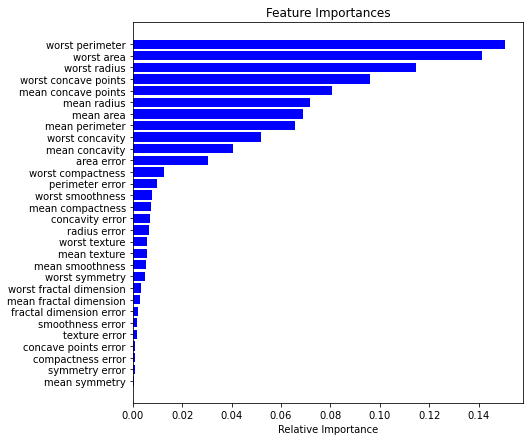

In [ ]:
# randomforest에서 학습된 모델에서 각 변수별 중요도
features = cancer.feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

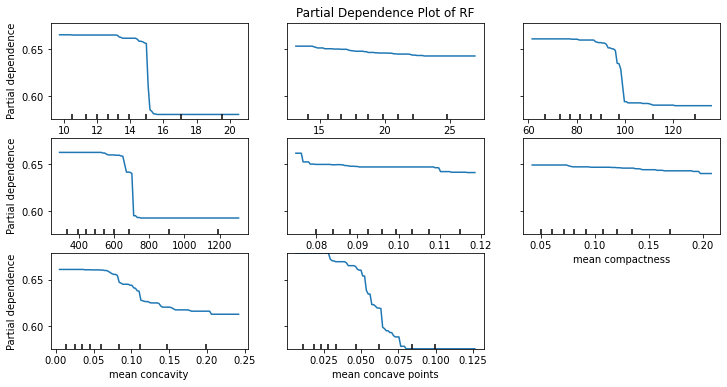

In [ ]:
# Partila Dependence Plot (PDP)란? : 하나 혹은 두 개의 변수가 예측 결과에 미치는 주변 효과(marginal effect)를 알아봄
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
features = [0,1,2,3,4,5,6,7]
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependence Plot of RF")
rf_disp = PartialDependenceDisplay.from_estimator(rf, X_train, features, feature_names=cancer.feature_names[features], n_jobs=6, ax=ax)

In [ ]:
# Random Foest 모형 평가
from sklearn.metrics import accuracy_score
y_pred_rf = rf.predict(X_test) # 예측값
print (rf.score(X_test, y_test))
pred_prob_rf = rf.predict_proba(X_test)
print(accuracy_score(y_test, y_pred_bag), accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_rf))

0.9824561403508771
0.9736842105263158 0.9298245614035088 0.9824561403508771


### Boosting (부스팅)
> 예측력이 약한 모형(weak learner)들을 결합하여 강한 예측모형을 만들기 위해 고안됨<br>약한 예측모형이란 랜덤하게 예측하는 것보다 약간 좋은 예측력을 지닌 모형

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
gbm.score(X_test, y_test)

0.9736842105263158

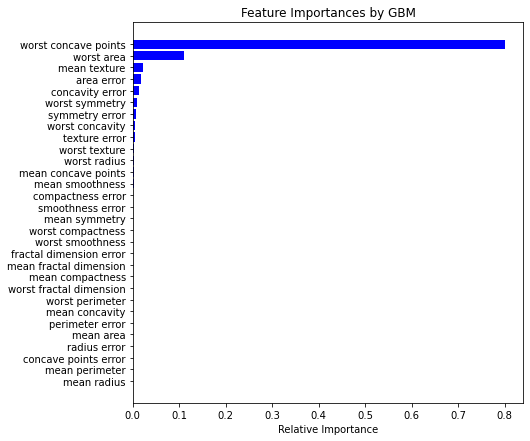

In [ ]:
features = cancer.feature_names
importances = gbm.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7,7))
plt.title('Feature Importances by GBM')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
y_pred_gbm = gbm.predict(X_test)
print (gbm.score(X_test, y_test))
pred_prob_gbm = gbm.predict_proba(X_test)
print("Formal Decision tree:",accuracy_score(y_test, y_pred_tree),
      "Bagging :",accuracy_score(y_test, y_pred_bag),
      "Random Forest:",accuracy_score(y_test, y_pred_rf),
      "Gradiant boostin:",accuracy_score(y_test, y_pred_gbm))

0.9736842105263158
Formal Decision tree: 0.9298245614035088 Bagging : 0.9736842105263158 Random Forest: 0.9824561403508771 Gradiant boostin: 0.9736842105263158
